In [14]:
import bs4
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [15]:
# Get the HTML of the page
url = "https://www.boxofficemojo.com/release/rl4254237441/?ref_=bo_rl_tab#tabs"
response = requests.get(url)

In [17]:
# Create the soup object
soup = bs4.BeautifulSoup(response.text, "html.parser")

# Table selector: #table
table = soup.select("#table")

# Create a list of the table rows
rows = table[0].findAll("tr")

# Create a list of the table headers
headers = [i.text for i in rows[0].findAll("th")]
headers = [i.replace("\n", "").strip() for i in headers]

# Create a list of the table data
data = []

# Loop through the rows and append the data to the list
for row in rows[1:]:
    row_data = [i.text for i in row.findAll("td")]
    data.append(row_data)
    print(row_data)

['Jul 4Independence Day', 'Tuesday', '1', '$14,242,063', '-', '-', '2,634', '$5,407', '$14,242,063', '1', 'false']
['Jul 5', 'Wednesday', '2', '$4,047,558', '-71.6%', '-', '2,634', '$1,536', '$18,289,621', '2', 'false']
['Jul 6', 'Thursday', '2', '$3,697,749', '-8.6%', '-', '2,634', '$1,403', '$21,987,370', '3', 'false']
['Jul 7', 'Friday', '3', '$5,208,443', '+40.9%', '-', '2,852', '$1,826', '$27,195,813', '4', 'false']
['Jul 8', 'Saturday', '3', '$7,176,860', '+37.8%', '-', '2,852', '$2,516', '$34,372,673', '5', 'false']
['Jul 9', 'Sunday', '3', '$7,295,576', '+1.7%', '-', '2,852', '$2,558', '$41,668,249', '6', 'false']
['Jul 10', 'Monday', '1', '$4,000,345', '-45.2%', '-', '2,852', '$1,402', '$45,668,594', '7', 'false']
['Jul 11', 'Tuesday', '1', '$3,829,243', '-4.3%', '-73.1%', '2,852', '$1,342', '$49,497,837', '8', 'false']
['Jul 12', 'Wednesday', '2', '$4,424,714', '+15.6%', '+9.3%', '2,852', '$1,551', '$53,922,551', '9', 'false']
['Jul 13', 'Thursday', '2', '$4,576,030', '+3.4%'

In [5]:
# Create a dataframe from the data
columns = [
    'Dia',
    'Dia da semana',
    'Cinemas',
    'Bilheteria diária',
    'Bilheteria média por cinema',
    'Bilheteria total até a data',
    
]
daily_data = pd.DataFrame(columns=columns)

# Weekdays translation
weekdays = {
    "Friday": "Sexta-feira",
    "Saturday": "Sábado",
    "Sunday": "Domingo",
    "Monday": "Segunda-feira",
    "Tuesday": "Terça-feira",
    "Wednesday": "Quarta-feira",
    "Thursday": "Quinta-feira"
}

for row in data:
    day_of_week = weekdays[row[1]]
    daily = float(row[3].replace("$", "").replace(",", "")) 
    theaters = int(row[6].replace(",", ""))#row[6]
    avg = float(row[7].replace("$", "").replace(",", "")) 
    to_date = float(row[8].replace("$", "").replace(",", "")) 
    day = row[9]
    daily_data = pd.concat([daily_data, pd.DataFrame([[
        day,
        day_of_week,
        theaters,
        daily,
        avg,
        to_date]],
        columns=columns)])

daily_data

,Dia,Dia da semana,Cinemas,Bilheteria diária,Bilheteria média por cinema,Bilheteria total até a data
0,1,Terça-feira,2634,14242063.0,5407.0,14242063.0
0,2,Quarta-feira,2634,4047558.0,1536.0,18289621.0
0,3,Quinta-feira,2634,3697749.0,1403.0,21987370.0
0,4,Sexta-feira,2852,5208443.0,1826.0,27195813.0
0,5,Sábado,2852,7176860.0,2516.0,34372673.0
...,...,...,...,...,...,...
0,100,Quarta-feira,78,3459.0,44.0,184050497.0
0,101,Quinta-feira,78,6297.0,80.0,184056794.0
0,102,Sexta-feira,72,5330.0,74.0,184062124.0
0,103,Sábado,72,6784.0,94.0,184068908.0


In [6]:
# Plot the daily gross
def plot_daily_gross(days: list, daily_gross: list, title: str):
    plt.figure(figsize=(20, 5))
    plt.plot(days, daily_gross)
    xticks_indices = np.arange(0, len(days), 5)
    xticks_labels = [days[i] for i in xticks_indices]
    plt.xticks(xticks_indices, xticks_labels, rotation=90)
    plt.xticks(rotation=90)
    plt.title(title)
    plt.xlabel("Dia")
    plt.ylabel("Valor ($)")

    # Apply the same Y-axis formatting as in the first function
    plt.gca().get_yaxis().set_major_formatter(
        plt.FuncFormatter(
            lambda x, loc: "{:,}".format(int(x)).replace(',', '.') + ',00'))

    plt.show()

In [7]:
# Plot daily cinema count
def plot_daily_cinema_count(days: list, cinemas: list, title: str):
    plt.figure(figsize=(20, 5))
    plt.plot(days, cinemas)
    xticks_indices = np.arange(0, len(days), 5)
    xticks_labels = [days[i] for i in xticks_indices]
    plt.xticks(xticks_indices, xticks_labels, rotation=90)
    plt.xticks(rotation=90)
    plt.title(title)
    plt.xlabel("Dia")
    plt.ylabel("Número de cinemas")
    plt.show()

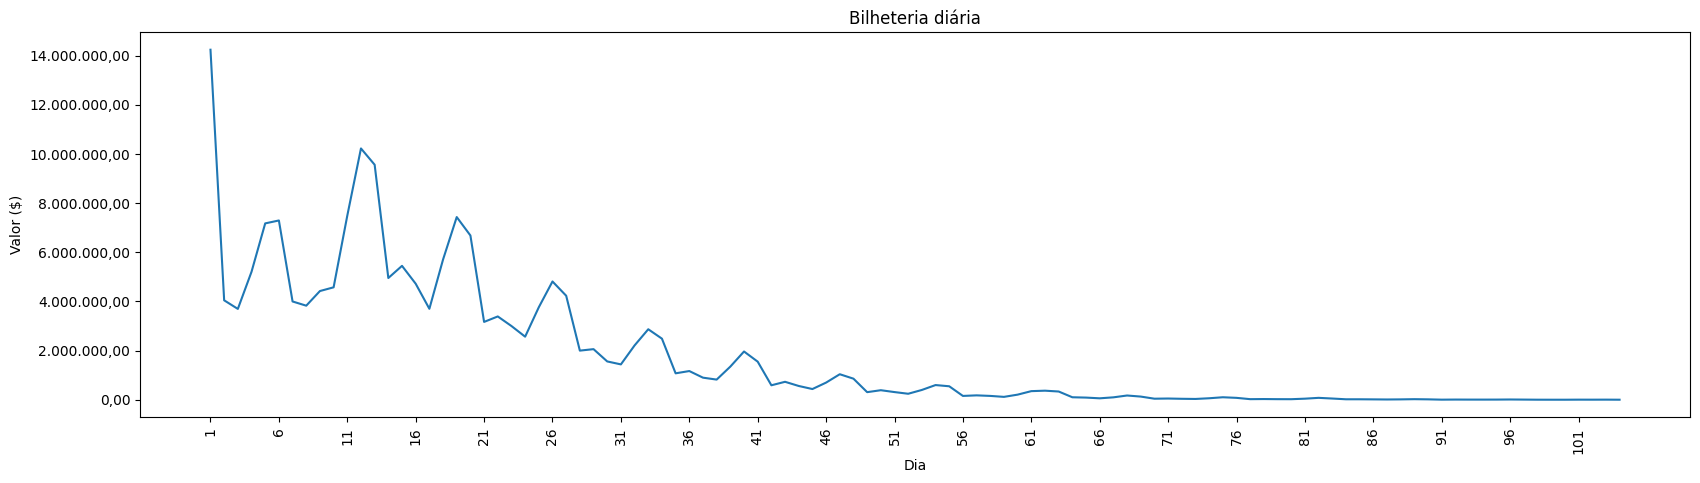

In [8]:
plot_daily_gross(
    days=daily_data["Dia"].to_list(),
    daily_gross=daily_data["Bilheteria diária"].to_list(),
    title="Bilheteria diária"
)

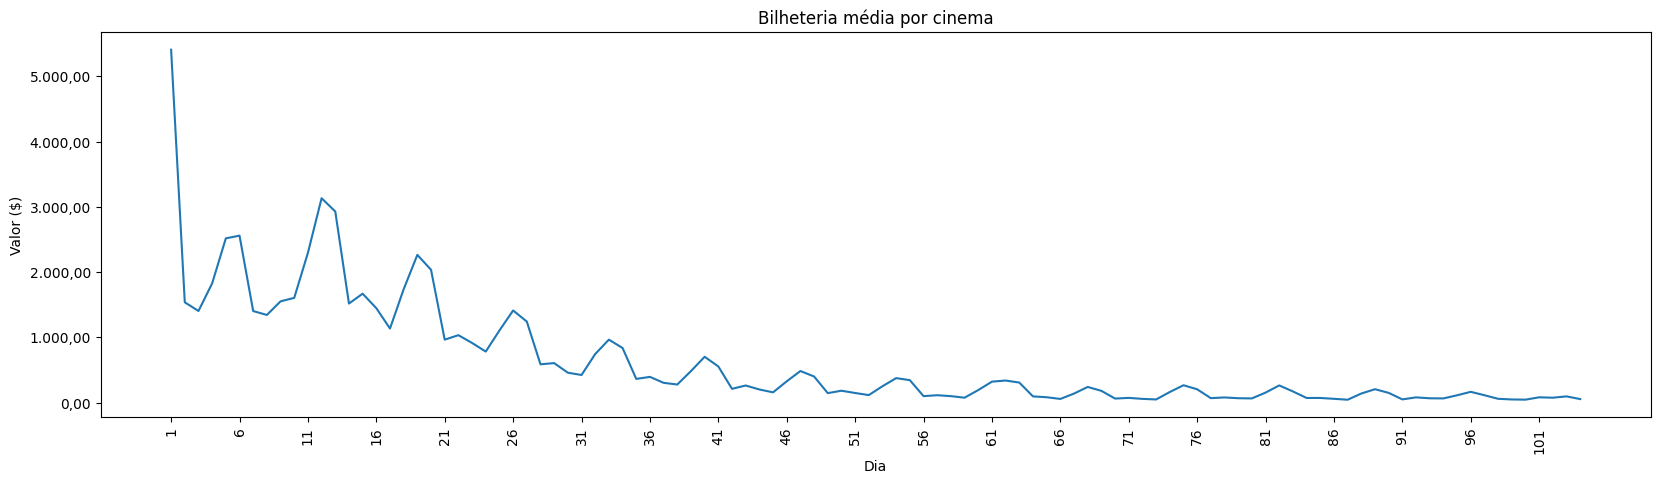

In [9]:
plot_daily_gross(
    days=daily_data["Dia"].to_list(),
    daily_gross=daily_data["Bilheteria média por cinema"].to_list(),
    title="Bilheteria média por cinema"
)

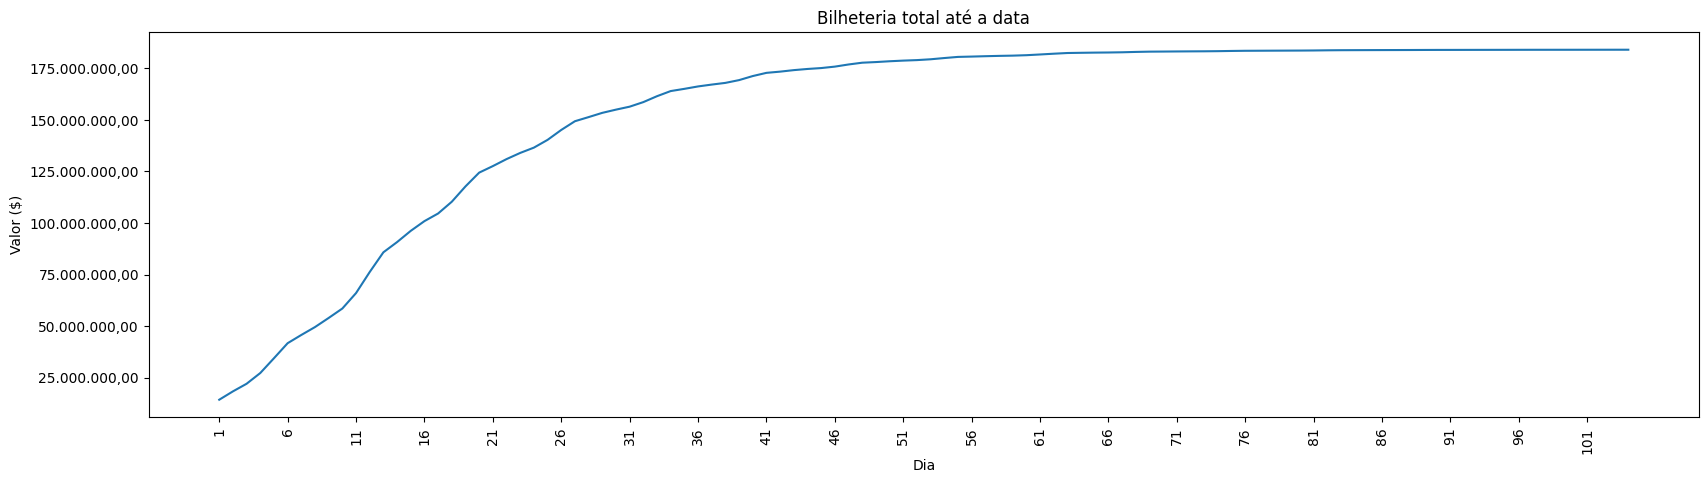

In [10]:
plot_daily_gross(
    days=daily_data["Dia"].to_list(),
    daily_gross=daily_data["Bilheteria total até a data"].to_list(),
    title="Bilheteria total até a data"
)

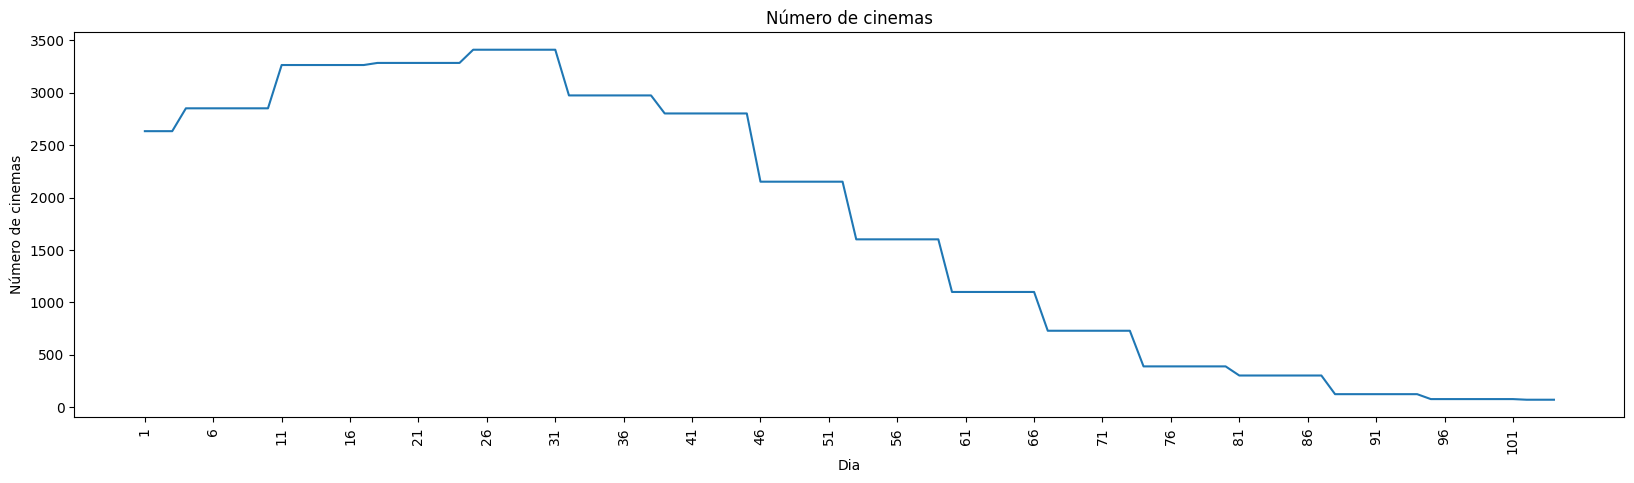

In [11]:
plot_daily_cinema_count(
    days=daily_data["Dia"].to_list(),
    cinemas=daily_data["Cinemas"].to_list(),
    title="Número de cinemas"
)

In [12]:
# Test correlation between variables
daily_data[['Dia', 'Bilheteria total até a data']].corr(method='spearman')

,Dia,Bilheteria total até a data
Dia,1.0,1.0
Bilheteria total até a data,1.0,1.0


In [13]:
daily_data.to_csv("../csv/box_office_daily.csv", index=False)